In [2]:
import os
from os.path import isdir, join
from pathlib import Path

#Scientific Library
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from scipy.misc import imread
from sklearn import metrics
import glob
import seaborn as sns
import cv2
from tensorflow.python.data import Dataset

# Visualization Library
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
    
%matplotlib inline

10 classes from the list : 
yes, no, up, down, left, right, on, off, stop, go

2 classes below :
1. 6 pictures from silence * randomly selected multiplication to equal 400 -> 100 (penalize).
2. everything else to unknown

Take 200 pictures from each class above - 2000 total
and from the rest of 20 classes, take 200 pictures from each - 4000 pictures for unknown

Possible Data Augmentation on 6 pictures for silence = 400 -> 50

-> for now, total of 2000 + 4000 + 50 = 6050 pictures.
Everything in order.

In [49]:
cat = os.listdir('../input/audio/cat')
down = os.listdir('../input/audio/down')
four = os.listdir('../input/audio/four')
house = os.listdir('../input/audio/house')
nine = os.listdir('../input/audio/nine')
on = os.listdir('../input/audio/on')
seven = os.listdir('../input/audio/seven')
stop = os.listdir('../input/audio/stop')
two = os.listdir('../input/audio/two')
yes = os.listdir('../input/audio/yes')
bed = os.listdir('../input/audio/bed')
eight = os.listdir('../input/audio/eight')
go = os.listdir('../input/audio/go')
left = os.listdir('../input/audio/left')
no = os.listdir('../input/audio/no')
one = os.listdir('../input/audio/one')
sheila = os.listdir('../input/audio/sheila')
three = os.listdir('../input/audio/three')
up = os.listdir('../input/audio/up')
zero = os.listdir('../input/audio/zero')
bird = os.listdir('../input/audio/bird')
dog = os.listdir('../input/audio/dog')
five = os.listdir('../input/audio/five')
happy = os.listdir('../input/audio/happy')
marvin = os.listdir('../input/audio/marvin')
off = os.listdir('../input/audio/off')
right = os.listdir('../input/audio/right')
six = os.listdir('../input/audio/six')
tree = os.listdir('../input/audio/tree')
wow = os.listdir('../input/audio/wow')
silence = os.listdir('../input/audio/silence')

In [50]:
print(len(yes))

2377


by doing ls -R | wc -l, found out there are total of 64823 spectrogram. We will put in 100 from each first.

In [51]:
#no[2]

In [52]:
#data = np.empty((100,129,256), dtype=np.float32)

In [53]:
#index=0
#image_name_list = sheila
#for image_name in image_name_list[:100]:
#    imageA = plt.imread('../input/audio/sheila/' + image_name)
#    data[index] = imageA
#    index+=1

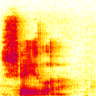

In [54]:
from PIL import Image
a=Image.open('../input/audio/sheila/' + sheila[9])
a

In [55]:
image_name_list = yes[:10]

In [56]:
image_name_list

['47565088_nohash_0.png',
 'd430b3cc_nohash_0.png',
 '151bfb79_nohash_1.png',
 'e8e960fd_nohash_0.png',
 '7096522d_nohash_0.png',
 '24c9f572_nohash_0.png',
 '5e3dde6b_nohash_1.png',
 'c1eebc0b_nohash_0.png',
 'a3fc7884_nohash_0.png',
 '333784b7_nohash_4.png']

In [57]:
#shuffle images
from random import shuffle

In [58]:
shuffle(cat)
shuffle(down)
shuffle(four)
shuffle(house)
shuffle(nine)
shuffle(on)
shuffle(seven)
shuffle(stop)
shuffle(two)
shuffle(yes)
shuffle(bed)
shuffle(eight)
shuffle(go)
shuffle(left)
shuffle(no)
shuffle(one)
shuffle(sheila)
shuffle(three)
shuffle(up)
shuffle(zero)
shuffle(bird)
shuffle(dog)
shuffle(five)
shuffle(happy)
shuffle(marvin)
shuffle(off)
shuffle(right)
shuffle(six)
shuffle(tree)
shuffle(wow)
shuffle(silence)

In [59]:
#Convert Yes Spectrogram Images to Pixels

data = np.empty((6050,96,96,3), dtype=np.float32)

# top 10

index = 0
image_name_list = yes
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/yes/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = no
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/no/' + image_name)
    data[index] = imageA
    index+=1
        
image_name_list = up
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/up/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = down
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/down/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = left
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/left/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = right
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/right/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = on
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/on/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = off
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/off/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = stop
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/stop/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = go
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/go/' + image_name)
    data[index] = imageA
    index+=1
    
# Top 10 done

# Silence 100 pictures  
image_name_list = silence
for image_name in image_name_list[:50]:
    imageA = Image.open('../input/audio/silence/' + image_name)
    data[index] = imageA
    index+=1    

# Unknown : 20 pictures from the rest
    
image_name_list = cat
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/cat/' + image_name)
    data[index] = imageA
    index+=1
     
image_name_list = four
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/four/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = house
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/house/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = nine
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/nine/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = seven
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/seven/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = two
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/two/' + image_name)
    data[index] = imageA
    index+=1

image_name_list = bed
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/bed/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = eight
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/eight/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = one
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/one/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = sheila
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/sheila/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = three
for image_name in image_name_list[:200]:
    imageA = plt.imread('../input/audio/three/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = zero
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/zero/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = bird
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/bird/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = dog
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/dog/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = five
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/five/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = happy
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/happy/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = marvin
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/marvin/' + image_name)
    data[index] = imageA
    index+=1 
    
image_name_list = six
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/six/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = tree
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/tree/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = wow
for image_name in image_name_list[:200]:
    imageA = Image.open('../input/audio/wow/' + image_name)
    data[index] = imageA
    index+=1

In [60]:
# 4800 data sets with 30 classes and 100 spectrograms in each class
data.shape

(6050, 96, 96, 3)

In [61]:
# check if the end is not empty meaning that 3000 has all been transferred
data[-1]

array([[[255., 255., 255.],
        [255., 255., 250.],
        [255., 255., 231.],
        ...,
        [255., 255., 253.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 254.],
        [255., 255., 223.],
        [255., 255., 228.],
        ...,
        [255., 255., 248.],
        [255., 255., 254.],
        [255., 255., 239.]],

       [[255., 255., 220.],
        [255., 255., 191.],
        [255., 255., 218.],
        ...,
        [255., 255., 197.],
        [255., 255., 213.],
        [255., 255., 181.]],

       ...,

       [[248.,  66.,   2.],
        [240.,  16.,   8.],
        [242.,  20.,   4.],
        ...,
        [244.,  32.,   2.],
        [242.,  24.,   5.],
        [244.,  34.,   3.]],

       [[253., 115.,   0.],
        [247.,  59.,   3.],
        [244.,  38.,   4.],
        ...,
        [247.,  55.,   1.],
        [247.,  61.,   4.],
        [244.,  34.,   4.]],

       [[255., 166.,   2.],
        [255., 181.,   8.],
        [254., 1

In [62]:
data = data/255

(96, 96, 3)


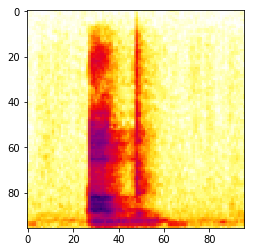

In [63]:
#show one image
plt.imshow(data[456])
print(data[456].shape)

In [64]:
print("min of pixel : " + str(data[0].min()))
print("max of pixel : " + str(data[0].max()))

min of pixel : 0.0
max of pixel : 1.0


In [65]:
"""
#concatenate all the flattened spectrograms in order
fl_data = np.empty((4800,2500), dtype=np.float32)

for i in range(len(data)):
    flat = data[i].flatten()
    fl_data[i] = flat
"""

'\n#concatenate all the flattened spectrograms in order\nfl_data = np.empty((4800,2500), dtype=np.float32)\n\nfor i in range(len(data)):\n    flat = data[i].flatten()\n    fl_data[i] = flat\n'

In [66]:
"""
# check if transferred all
print("size : " + str(fl_data.shape))
print(fl_data[-1])
"""

'\n# check if transferred all\nprint("size : " + str(fl_data.shape))\nprint(fl_data[-1])\n'

In [67]:
#for i in range(30):
#    print(i % 10)

In [68]:
#unique
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x)
    # print list 
    for x in unique_list: 
        print (x) 

In [69]:
# create labels
label = np.zeros((200,), dtype=int)

for i in range(1, 10):
    label = np.concatenate((label, np.repeat(i, 200)))
    
label = np.concatenate((label, np.repeat(10, 50)))
label = np.concatenate((label, np.repeat(11, 4000)))

In [70]:
# check uniques
unique(label)

0
1
2
3
4
5
6
7
8
9
10
11


In [71]:
print(label.shape)
print(type(label[0]))

(6050,)
<class 'numpy.int64'>


In [72]:
#label = label.reshape((4800,1))

In [73]:
#type(np.float64(label[0][0]))

In [74]:
label.shape

(6050,)

In [75]:
#fl_data.shape

In [76]:
"""
#one hot encode the lable
b = np.zeros((label.size, label.max()+1))
b[np.arange(label.size), label] = 1
#labels = b
"""

'\n#one hot encode the lable\nb = np.zeros((label.size, label.max()+1))\nb[np.arange(label.size), label] = 1\n#labels = b\n'

### check on prepared datasets

In [77]:
"""
print(fl_data.shape)
print(labels.shape)
"""

'\nprint(fl_data.shape)\nprint(labels.shape)\n'

### Before dividing into train and test sets, let's combine so we can shuffle

In [78]:
#a=np.concatenate((fl_data, label), axis=1)
#a.shape

In [79]:
#shuffle
#np.random.shuffle(a)

In [80]:
#how to slice the labels again
#new_labels=a[:,-1:]#.sum()
#new_labels.shape

In [81]:
#how to slice the train again
#train_data=a[:,:2500]
#train_data.shape

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, label, test_size = 0.2)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4840, 96, 96, 3), (1210, 96, 96, 3), (4840,), (1210,))

In [83]:
"""
x_train = train_data[:4000]
print("train : " + str(x_train.shape))
x_val = train_data[4000:]
print("train validation : " + str(x_val.shape))
y_train = new_labels[:4000]
y_train = np.int64(y_train)
print("train label : " + str(y_train.shape))
y_val = new_labels[4000:]
y_val = np.int64(y_val)
print("train validation label : " + str(y_val.shape))
"""

'\nx_train = train_data[:4000]\nprint("train : " + str(x_train.shape))\nx_val = train_data[4000:]\nprint("train validation : " + str(x_val.shape))\ny_train = new_labels[:4000]\ny_train = np.int64(y_train)\nprint("train label : " + str(y_train.shape))\ny_val = new_labels[4000:]\ny_val = np.int64(y_val)\nprint("train validation label : " + str(y_val.shape))\n'

In [84]:
"""
#change data types to df
x_train = pd.DataFrame(x_train)
x_val = pd.DataFrame(x_val)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
"""

'\n#change data types to df\nx_train = pd.DataFrame(x_train)\nx_val = pd.DataFrame(x_val)\ny_train = pd.DataFrame(y_train)\ny_val = pd.DataFrame(y_val)\n'

In [85]:
print(type(x_train[0][0][0]))
y_train = np.int32(y_train)
print(type(y_train[0]))
print(type(x_val[0][0][0]))
y_val = np.int32(y_val)
print(type(y_val[0]))

<class 'numpy.ndarray'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>


In [86]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(4840, 96, 96, 3)
(4840,)
(1210, 96, 96, 3)
(1210,)


## CNN Helper f(x)

In [3]:
def cnn_model_fn(features, labels, mode):
  # Input Layer
    input_layer = tf.reshape(features, [-1, 96, 96, 3])

  # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2) 

  # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 36864])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=12)

    predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    # here we define how we calculate our accuracy
    # if you want to monitor your training accuracy you need these two lines
    accuracy = tf.metrics.accuracy(labels=labels, predictions=predictions['classes'], name='acc_op')
    tf.summary.scalar('accuracy', accuracy[1])
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        tf.identity(accuracy[1], name='train_accuracy')
        tf.summary.scalar('train_accuracy', accuracy[1])
        eval_metric_ops = {'train_accuracy':accuracy}
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op, eval_metric_ops=eval_metric_ops)

    # Add evaluation metrics (for EVAL mode)
    tf.identity(accuracy[1], name='val_accuracy')
    tf.summary.scalar('val_accuracy', accuracy[1])
    eval_metric_ops = {'val_accuracy':accuracy}
    #eval_metric_ops = {
    #  "accuracy": tf.metrics.accuracy(
    #      labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [4]:
def construct_feature_columns():
    return set([tf.feature_column.numeric_column('pixels', shape=9216)])

In [5]:
def create_predict_input_fn(features, labels, batch_size):
    predict_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=features,
        y=labels,
        num_epochs=1,
        shuffle=False)
    return predict_input_fn

def create_training_input_fn(features, labels, batch_size):
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=features,
        y=labels,
        batch_size=batch_size,
        num_epochs=None,
        shuffle=True)
    return train_input_fn

In [6]:
training_examples = x_train
validation_examples = x_val
training_targets = y_train
validation_targets = y_val

NameError: name 'x_train' is not defined

In [ ]:
def train_hub_classification_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):

    periods = 10
    steps_per_period = steps / periods 
    
    predict_training_input_fn = create_predict_input_fn(training_examples, training_targets, batch_size)
    predict_validation_input_fn = create_predict_input_fn(validation_examples, validation_targets, batch_size)
  
    training_input_fn = create_training_input_fn(training_examples, training_targets, batch_size)
    predict_training_input_fn = create_predict_input_fn(training_examples, training_targets, batch_size)
    
    predict_validation_input_fn = create_predict_input_fn(validation_examples, validation_targets, batch_size)
    training_input_fn = create_training_input_fn(training_examples, training_targets, batch_size)
  
    feature_columns = [tf.feature_column.numeric_column('pixels', shape=9216)]

    my_optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

    classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn,
    model_dir="./mode_CNN_10"
    )

    
    print("Training model...")
    print("LogLoss error (on validation data):")
    training_errors = []
    validation_errors = []
    training_accu = []
    validation_accu = []
    for period in range (0, periods):
        classifier.train(
            input_fn=training_input_fn,
            steps=steps_per_period,
        )
        training_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
        training_probabilities = np.array([item['probabilities'] for item in training_predictions])
        training_pred_class_id = np.array([item['classes'] for item in training_predictions])
        training_pred_one_hot = tf.keras.utils.to_categorical(training_pred_class_id,12) #change class number

        validation_predictions = list(classifier.predict(input_fn=predict_validation_input_fn))
        validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])    
        validation_pred_class_id = np.array([item['classes'] for item in validation_predictions])
        validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,12) #change class number

        # Compute training and validation errors.
        training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
        #training_acc = metrics.accuracy_score(training_targets, training_predictions)
        validation_log_loss = metrics.log_loss(validation_targets, validation_pred_one_hot)
        #validation_acc = metrics.accuracy_score(validation_targets, validation_predictions)
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, validation_log_loss))
        # Add the loss metrics from this period to our list.
        training_errors.append(training_log_loss)
        validation_errors.append(validation_log_loss)
        #training_accu.append(training_acc)
        #validation_accu.append(validation_acc)
        
    print("Model training finished.")
    # Remove event files to save disk space.
    _ = map(os.remove, glob.glob(os.path.join(classifier.model_dir, 'events.out.tfevents*')))

    # Calculate final predictions (not probabilities, as above).
    final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
    final_predictions = np.array([item['classes'] for item in final_predictions])


    accuracy = metrics.accuracy_score(validation_targets, final_predictions)
    print("Final accuracy (on validation data): %0.2f" % accuracy)

    # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.plot(training_errors, label="training")
    plt.plot(validation_errors, label="validation")
    plt.legend()
    plt.show()
    
    #plt.ylabel("Accuracy")
    #plt.xlabel("Periods")
    #plt.title("Accuracy vs. Periods")
    #plt.plot(training_accu, label="training")
    #plt.plot(validation_accu, label="validation")
    #plt.legend()
    #plt.show()

    # Output a plot of the confusion matrix.
    cm = metrics.confusion_matrix(validation_targets, final_predictions)
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class).
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm_normalized, cmap="bone_r")
    ax.set_aspect(1)
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

    return classifier

In [ ]:
#validation accuracy
file_writer = tf.summary.FileWriter('./mode_CNN_10')

In [92]:
#len(set(training_targets))
#validation_targets
print(validation_examples.shape)
print(len(validation_examples))

(1210, 96, 96, 3)
1210


In [93]:
print(len(set(validation_targets)))
print(len(set(training_targets)))

12
12


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './mode_CNN_10', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fea5cd81e48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
LogLoss error (on validation data):
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instruc

INFO:tensorflow:loss = 0.90663093, step = 2001
INFO:tensorflow:global_step/sec: 3.48286
INFO:tensorflow:loss = 1.0363153, step = 2101 (28.714 sec)
INFO:tensorflow:global_step/sec: 3.45993
INFO:tensorflow:loss = 1.6191555, step = 2201 (28.903 sec)
INFO:tensorflow:global_step/sec: 3.51045
INFO:tensorflow:loss = 0.40787145, step = 2301 (28.487 sec)
INFO:tensorflow:global_step/sec: 3.50401
INFO:tensorflow:loss = 0.99715376, step = 2401 (28.540 sec)
INFO:tensorflow:Saving checkpoints for 2500 into ./mode_CNN_10/model.ckpt.
INFO:tensorflow:Loss for final step: 0.7723652.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-2500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_

INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
  period 09 : 8.14
Model training finished.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Final accuracy (on validation data): 0.76


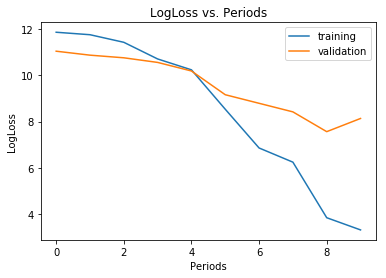

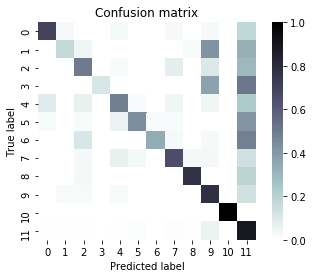

In [95]:
classifier = train_hub_classification_model(
    learning_rate=0.001,
    steps=5000,
    batch_size=10,
    hidden_units=[100, 100],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [52]:
"""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-52-e4615a684824>, line 1)

# PREDS

In [7]:
classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn,
    model_dir="./mode_CNN_10",
    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './mode_CNN_10', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f231c0d8438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
def my_test_input_fn(features, batch_size=1, num_epochs=None):
    raw_features = features
    ds = Dataset.from_tensor_slices((raw_features))
    ds = ds.batch(batch_size).repeat(num_epochs)
    features = ds.make_one_shot_iterator().get_next()
    return features

predict_test_input_fn = lambda: my_test_input_fn(
    test_images,
    num_epochs=1,)

In [9]:
test_pict_path = '../input/audio_test/'

In [10]:
plt.imread('../input/audio_test/clip_000044442.png').shape==(96,96,3)

True

## Sub-divide into 10,000 test files to prevent tensor 2MB error

In [100]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
corrupt = 0
test_images = []
fnames = []
for file in all_files[:10000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
        corrupt = corrupt+1
    fnames.append(file[:-4] + '.wav')

print(corrupt)    

test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'a' + '.csv', index=False)


<class 'list'>
227


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [101]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[10000:20000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'b' + '.csv', index=False)


<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[20000:30000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'c' + '.csv', index=False)


<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0

test_images = []
fnames = []
for file in all_files[30000:40000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')

test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'd' + '.csv', index=False)


<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[40000:50000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'e' + '.csv', index=False)


<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[50000:60000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'f' + '.csv', index=False)

<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [11]:
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[60000:70000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'g' + '.csv', index=False)

<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [12]:
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[70000:80000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'h' + '.csv', index=False)

<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [13]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[80000:90000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'i' + '.csv', index=False)


<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [14]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[90000:100000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'j' + '.csv', index=False)


<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[100000:110000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'k' + '.csv', index=False)


<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[110000:120000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'l' + '.csv', index=False)


<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[120000:130000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'm' + '.csv', index=False)


<class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_10/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:

test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[130000:140000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'n' + '.csv', index=False)


<class 'list'>


In [ ]:
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[140000:150000]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'o' + '.csv', index=False)

In [ ]:
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[150000:]:
    if (plt.imread(test_pict_path + file).shape == (96,96,3)):
        test_images.append(cv2.imread(test_pict_path + file))
    else : 
        test_images.append(np.empty((96,96,3), dtype=np.float32))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'p' + '.csv', index=False)

## Pred Labels

In [21]:
label_dict = {'yes':0, 'no':1, 'up':2, 'down':3, 'left':4, 'right':5, 'on':6, 'off':7, 
              'stop':8, 'go':9, 'silence':10, 'unknown':11}

reverse_dict = {v: k for k, v in label_dict.items()}

In [22]:
d0 = pd.read_csv("./speech_" + 'a' + ".csv",sep=",")
d1 = pd.read_csv("./speech_" + 'b' + ".csv",sep=",")
d2 = pd.read_csv("./speech_" + 'c' + ".csv",sep=",")
d3 = pd.read_csv("./speech_" + 'd' + ".csv",sep=",")
d4 = pd.read_csv("./speech_" + 'e' + ".csv",sep=",")
d5 = pd.read_csv("./speech_" + 'f' + ".csv",sep=",")
d6 = pd.read_csv("./speech_" + 'g' + ".csv",sep=",")
d7 = pd.read_csv("./speech_" + 'h' + ".csv",sep=",")
d8 = pd.read_csv("./speech_" + 'i' + ".csv",sep=",")
d9 = pd.read_csv("./speech_" + 'j' + ".csv",sep=",")
d10 = pd.read_csv("./speech_" + 'k' + ".csv",sep=",")
d11 = pd.read_csv("./speech_" + 'l' + ".csv",sep=",")
d12 = pd.read_csv("./speech_" + 'm' + ".csv",sep=",")
d13 = pd.read_csv("./speech_" + 'n' + ".csv",sep=",")
d14 = pd.read_csv("./speech_" + 'o' + ".csv",sep=",")
d15 = pd.read_csv("./speech_" + 'p' + ".csv",sep=",")

df = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15]
dx = pd.concat(df)

dx = dx.replace({"label": reverse_dict})

dx.to_csv('submission_v4.csv', index=False)
dx

fname    label
0     clip_25f96ade6.wav  silence
1     clip_ac8fa1682.wav  silence
2     clip_cdadf318a.wav  silence
3     clip_7419f0d7e.wav  silence
4     clip_9e83292d5.wav       on
5     clip_00f803721.wav  silence
6     clip_aafb5a6d9.wav       on
7     clip_0dee755a2.wav  unknown
8     clip_8070bb404.wav  unknown
9     clip_b3bef71f6.wav  silence
10    clip_b94577f1e.wav  silence
11    clip_4fd22b958.wav       on
12    clip_b3a950c47.wav  silence
13    clip_c87b8ff71.wav  silence
14    clip_a0039589b.wav  silence
15    clip_c7c4eaf1d.wav  silence
16    clip_f6ff9e9b5.wav  silence
17    clip_bfc01d316.wav      off
18    clip_6984491f2.wav  silence
19    clip_e51432c10.wav     down
20    clip_fe6ce335c.wav  unknown
21    clip_3e0ed2f0a.wav  silence
22    clip_c9f89457a.wav      off
23    clip_cc3cc2827.wav  silence
24    clip_7cc8f3c63.wav  silence
25    clip_3070880b8.wav      off
26    clip_6f112fd1e.wav  unknown
27    clip_fb1febbcd.wav      yes
28    clip_f8de61a7d.wav      off
29    clip_95442c1ad.wav  silence
...                  ...      ...
8508  clip_a409e7c59.wav  unknown
8509  clip_17a284d62.wav  silence
8510  clip_ccc2cf3a0.wav  silence
8511  clip_a022d6b0f.wav  silence
8512  clip_e80799edd.wav  unknown
8513  clip_590b569d6.wav  unknown
8514  clip_f307872c0.wav  silence
8515  clip_97bddae19.wav  unknown
8516  clip_9a3d8e307.wav  unknown
8517  clip_192c4c8b7.wav  silence
8518  clip_aa5f97a5e.wav  silence
8519  clip_4d132f74e.wav  unknown
8520  clip_f213e6669.wav      off
8521  clip_cceddadaf.wav  silence
8522  clip_e4409418c.wav       on
8523  clip_3405ed2d1.wav  unknown
8524  clip_4b2d5d22f.wav  unknown
8525  clip_f7d8f27d3.wav  silence
8526  clip_08e2f8e78.wav  silence
8527  clip_1374683d1.wav  silence
8528  clip_135bc0720.wav  unknown
8529  clip_b903ccfbb.wav  unknown
8530  clip_d63120591.wav  silence
8531  clip_c0f642e3c.wav  unknown
8532  clip_82890a52e.wav  silence
8533  clip_fd9ac86a1.wav  silence
8534  clip_61a6cc3a0.wav  unknown
8535  clip_701cc7171.wav  unknown
8536  clip_38d480e69.wav  silence
8537  clip_7843dfbdb.wav  silence

[158538 rows x 2 columns]

In [23]:
dx.groupby('label').nunique()

fname  label
label                
down      5167      1
go         915      1
left        25      1
no           1      1
off      13678      1
on        4845      1
right      836      1
silence  62904      1
stop         4      1
unknown  65579      1
up         189      1
yes       4395      1